#Task-04

*Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.*

Dataset Loading

In [22]:
# Download data using the Kaggle API:
!pip install kaggle

In [38]:
import os
os.makedirs('/root/.kaggle/', exist_ok=True)
!cp /path_to_your/kaggle.json /root/.kaggle/kaggle.json

cp: cannot stat '/path_to_your/kaggle.json': No such file or directory


In [39]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


required libraries

In [53]:
import numpy as np

In [40]:
# required libraries
!pip install opendatasets
!pip install opencv-python-headless

import opendatasets as od

# Download the dataset
od.download("https://www.kaggle.com/c/dogs-vs-cats/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedehab202201236
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:06<00:00, 127MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


 Unzip the Dataset Files

In [41]:
import zipfile

# List of zip files to be unzipped
zip_files = ['test1.zip', 'train.zip']

# Unzipping the files
for zip_file in zip_files:
    with zipfile.ZipFile(f"./dogs-vs-cats/{zip_file}", "r") as z:
        z.extractall(".")
        print(f"{zip_file} has been successfully unzipped.")


test1.zip has been successfully unzipped.
train.zip has been successfully unzipped.


 List and Load Image Paths

In [42]:
import os
import pandas as pd

In [43]:
#list files in a directory
def list_files_in_directory(directory):
    return [os.path.join(directory, filename) for filename in os.listdir(directory) if os.path.isfile(os.path.join(directory, filename))]

# Get paths to train and test images
train_image_paths = list_files_in_directory("./train")
test_image_paths = list_files_in_directory("./test1")

# DataFrames to store image paths
train_df = pd.DataFrame({'image_path': train_image_paths})
test_df = pd.DataFrame({'image_path': test_image_paths})

In [44]:
print("Sample from train_df:\n", train_df.head())
print("Sample from test_df:\n", test_df.head())

Sample from train_df:
               image_path
0   ./train/dog.9219.jpg
1   ./train/dog.4665.jpg
2   ./train/dog.2652.jpg
3  ./train/dog.12436.jpg
4   ./train/cat.4559.jpg
Sample from test_df:
           image_path
0   ./test1/8793.jpg
1   ./test1/8581.jpg
2   ./test1/8610.jpg
3   ./test1/3896.jpg
4  ./test1/11234.jpg


 Separate Cats and Dogs Images

In [45]:
# Initialize lists for storing image paths
train_cats_dir = []
train_dogs_dir = []

In [46]:
# Separate cats and dogs images
for file_name in os.listdir("./train"):
    full_path = os.path.join("./train", file_name)
    target = file_name.split(".")[0]
    if target == "dog":
        train_dogs_dir.append(full_path)
    elif target == "cat":
        train_cats_dir.append(full_path)

In [47]:
print(f"Number of cat images: {len(train_cats_dir)}")
print(f"Number of dog images: {len(train_dogs_dir)}")


Number of cat images: 12500
Number of dog images: 12500


Display Sample Images

In [48]:
import matplotlib.pyplot as plt
import cv2

In [49]:
#load and convert an image to RGB
def load_image_rgb(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

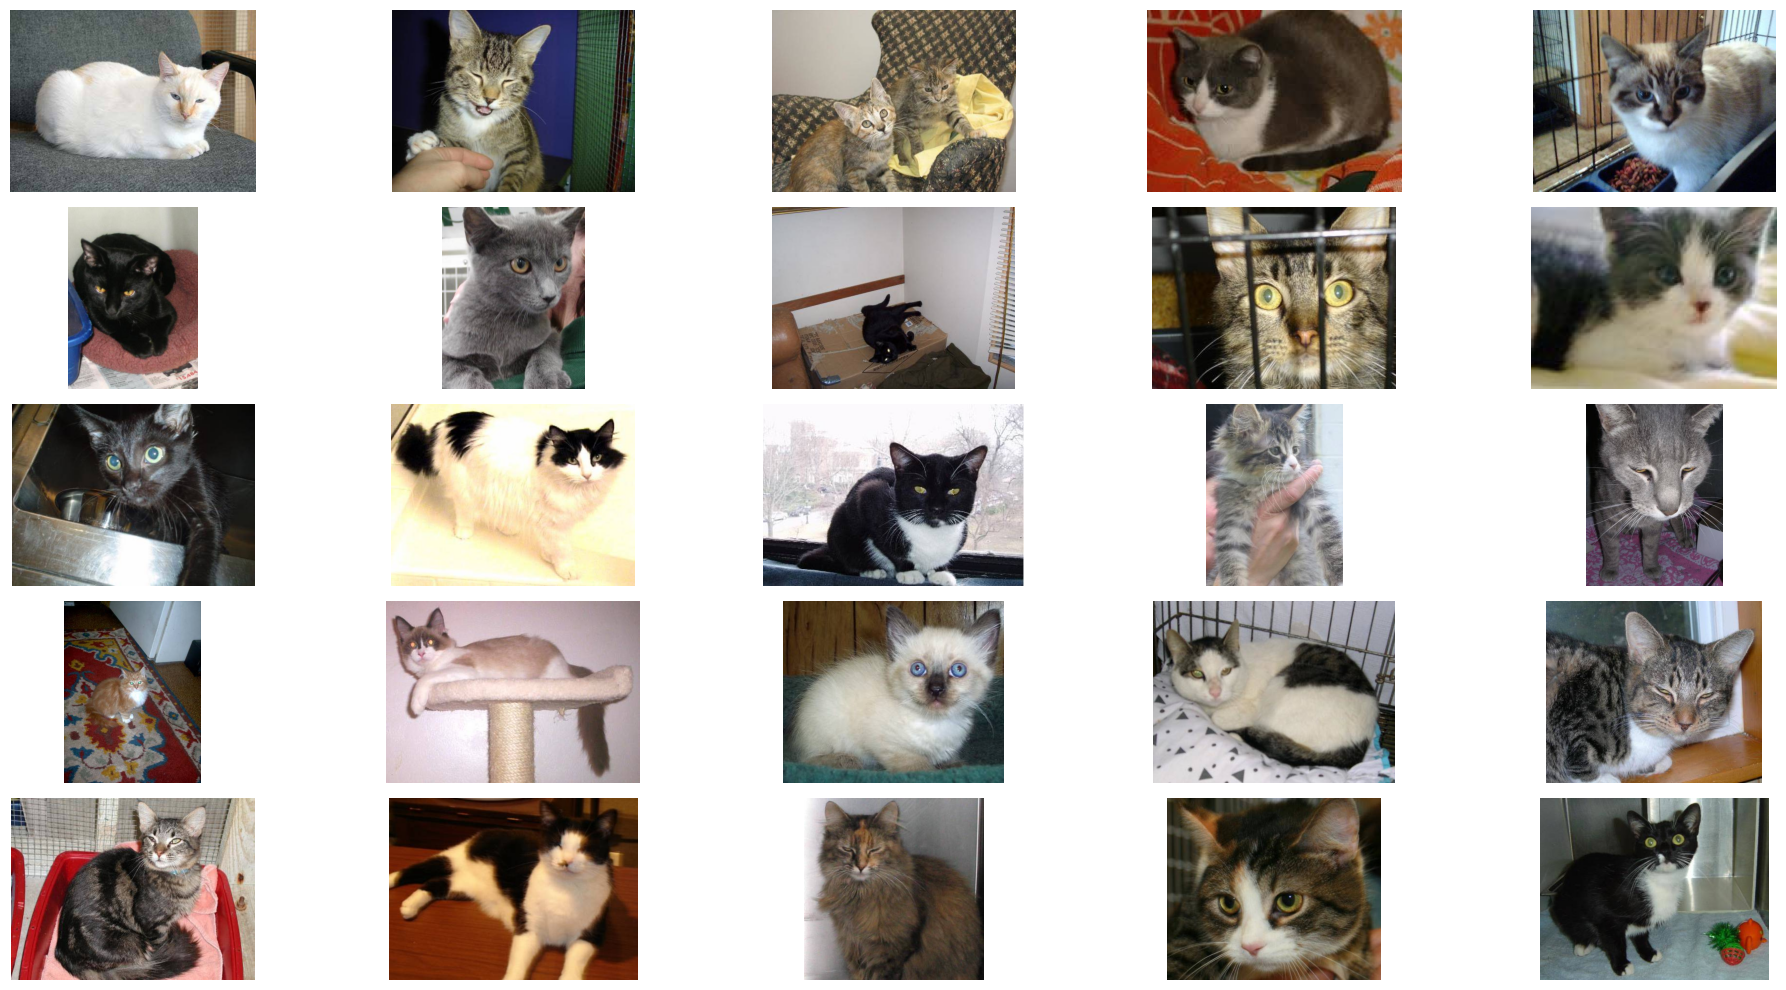

In [50]:
#sample images of cats
fig, axes = plt.subplots(5, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    img = load_image_rgb(train_cats_dir[i])
    ax.imshow(img)
    ax.axis('off')
fig.tight_layout()
plt.show()

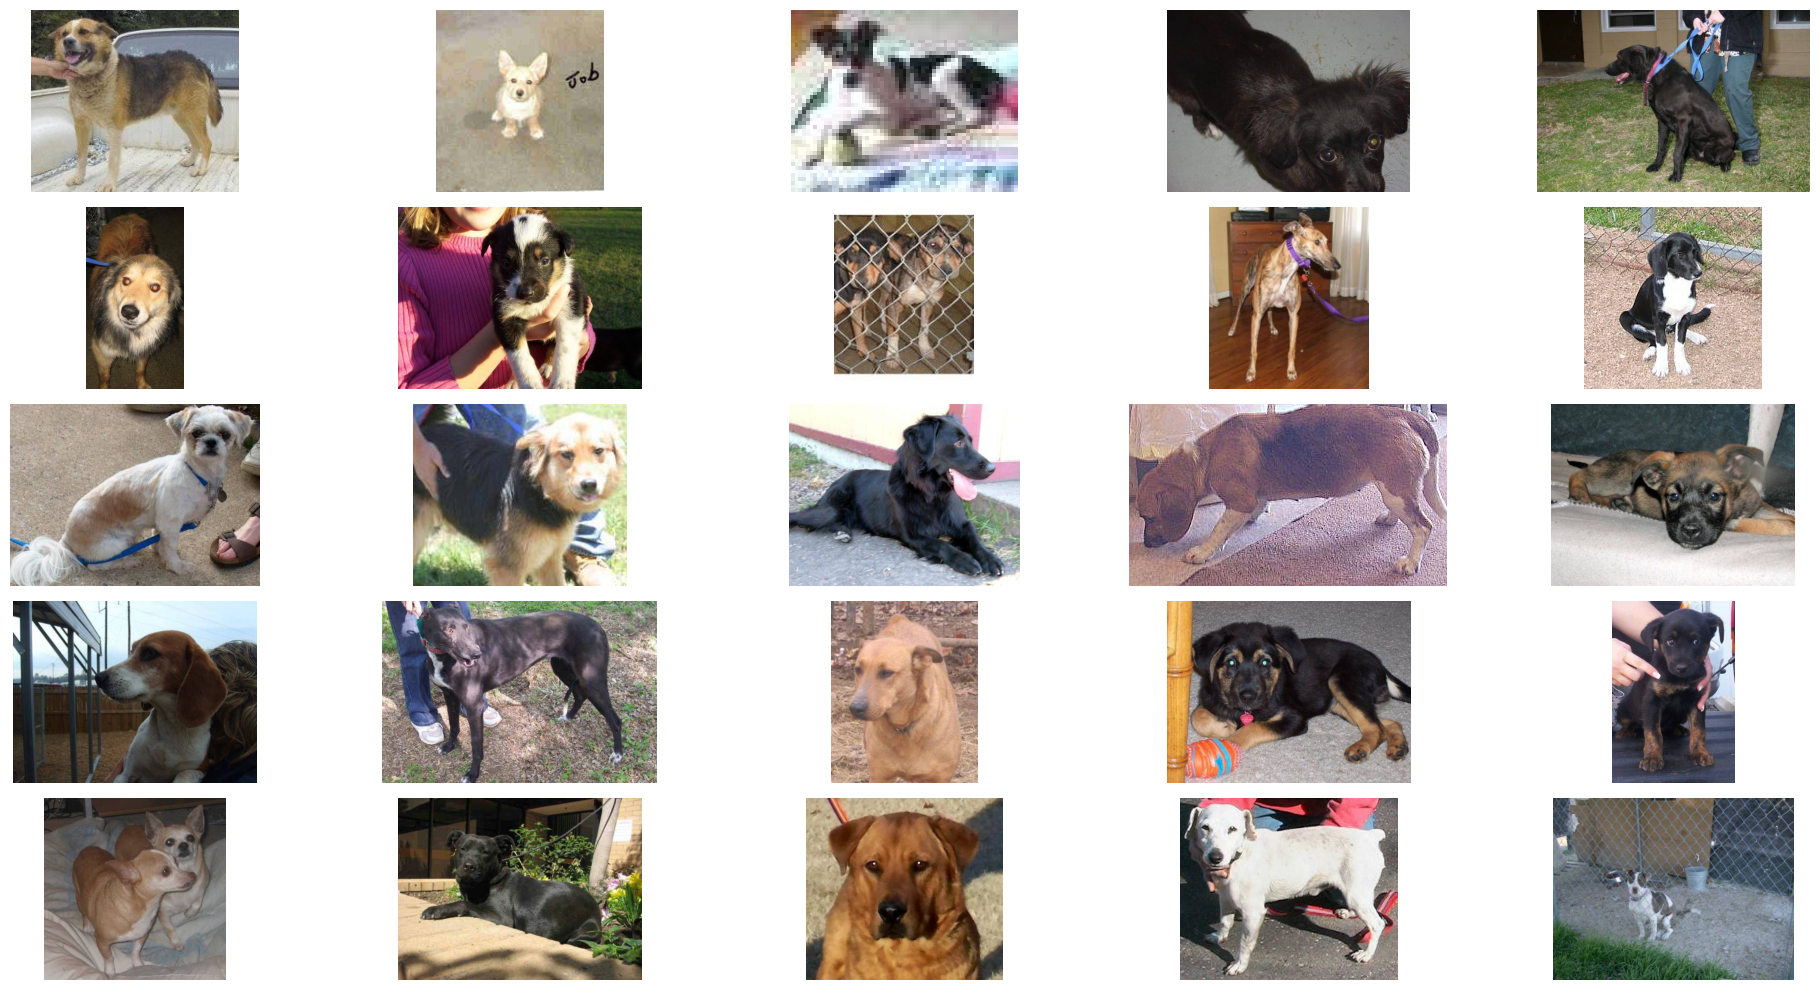

In [51]:
#sample images of dogs
fig, axes = plt.subplots(5, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    img = load_image_rgb(train_dogs_dir[i])
    ax.imshow(img)
    ax.axis('off')
fig.tight_layout()
plt.show()

 Preprocess Images

In [52]:
# (resize and flatten)
def preprocess_image(image_path, size=(64, 64)):
    image = load_image_rgb(image_path)
    resized_image = cv2.resize(image, size)
    return resized_image.flatten()

In [54]:
# Preprocess and store image data and labels
X, y = [], []

In [55]:
for index, row in train_df.iterrows():
    img_path = row['image_path']
    label = 'cat' if 'cat' in img_path else 'dog'
    features = preprocess_image(img_path)
    X.append(features)
    y.append(0 if label == 'cat' else 1)

X = np.array(X)
y = np.array(y)


 Train/Test Split and Data Normalization

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the SVM Classifier with PCA

In [59]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [60]:
# Build a pipeline with PCA and SVM
pca = PCA(n_components=100)
svm_model = SVC(kernel='rbf', random_state=42)
pipeline = make_pipeline(StandardScaler(), pca, svm_model)

In [61]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=100)), ('svc', SVC(random_state=42))])

Evaluate the Model

In [62]:
from sklearn.metrics import classification_report, accuracy_score

In [63]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [64]:
# Display accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Accuracy: 66.38%
Classification Report:
               precision    recall  f1-score   support

         cat       0.66      0.67      0.66      2463
         dog       0.67      0.66      0.67      2537

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [66]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

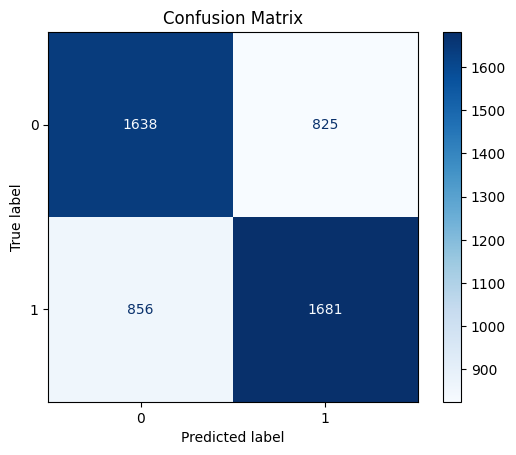

In [67]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Code to Plot the ROC Curve and Calculate AUC

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [69]:
# Predict probabilities instead of class labels
y_probs = pipeline.decision_function(X_test)

In [70]:
# Compute ROC curve and AUC for dogs vs cats classificatio
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

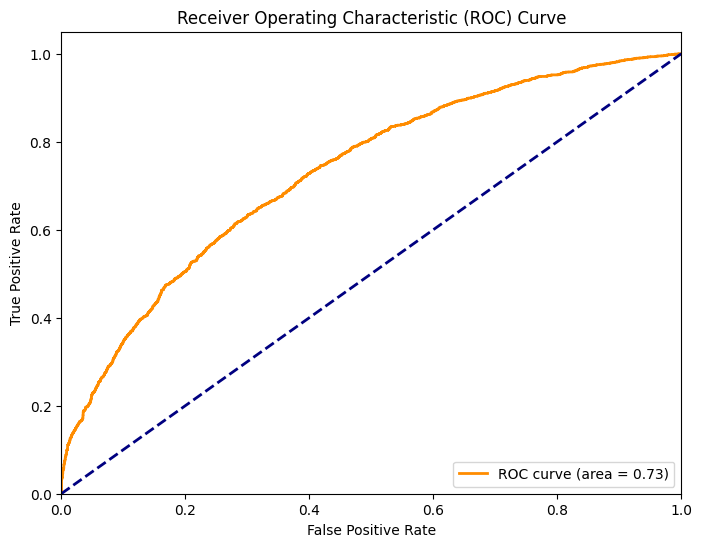

In [71]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
